In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model

In [62]:
data_dir_fixed = 'dataset_fix'

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inceptionpreprocess

In [88]:
train_datagen2 = ImageDataGenerator(   rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True, preprocessing_function =  inceptionpreprocess , validation_split = 0.2)
test_datagen2  = ImageDataGenerator( preprocessing_function =  inceptionpreprocess , validation_split = 0.2 )

In [89]:
train_datagen_fix_gen = train_datagen2.flow_from_directory(batch_size=32,
                                                 directory=data_dir_fixed,
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

Found 5758 images belonging to 15 classes.


In [90]:
test_datagen_fix_gen = train_datagen2.flow_from_directory(batch_size=32,
                                                 directory=data_dir_fixed,
                                                 shuffle=False,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1435 images belonging to 15 classes.


In [139]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [140]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1128 (Conv2D)           (None, 74, 74, 32)   864         ['input_13[0][0]']               
                                                                                                  
 batch_normalization_1128 (Batc  (None, 74, 74, 32)  96          ['conv2d_1128[0][0]']            
 hNormalization)                                                                                  
                                                                                       

 conv2d_1138 (Conv2D)           (None, 16, 16, 96)   82944       ['activation_1137[0][0]']        
                                                                                                  
 conv2d_1139 (Conv2D)           (None, 16, 16, 32)   6144        ['average_pooling2d_108[0][0]']  
                                                                                                  
 batch_normalization_1133 (Batc  (None, 16, 16, 64)  192         ['conv2d_1133[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1135 (Batc  (None, 16, 16, 64)  192         ['conv2d_1135[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1142 (Activation)   (None, 16, 16, 64)   0           ['batch_normalization_1142[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1145 (Activation)   (None, 16, 16, 96)   0           ['batch_normalization_1145[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1146 (Activation)   (None, 16, 16, 64)   0           ['batch_normalization_1146[0][0]'
                                                                 ]                                
                                                                                                  
 mixed1 (Concatenate)           (None, 16, 16, 288)  0           ['activation_1140[0][0]',        
          

 activation_1155 (Activation)   (None, 16, 16, 64)   0           ['batch_normalization_1155[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1156 (Conv2D)           (None, 16, 16, 96)   55296       ['activation_1155[0][0]']        
                                                                                                  
 batch_normalization_1156 (Batc  (None, 16, 16, 96)  288         ['conv2d_1156[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1156 (Activation)   (None, 16, 16, 96)   0           ['batch_normalization_1156[0][0]'
                                                                 ]                                
          

 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1158 (Conv2D)           (None, 7, 7, 192)    147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1161 (Conv2D)           (None, 7, 7, 192)    172032      ['activation_1160[0][0]']        
                                                                                                  
 conv2d_1166 (Conv2D)           (None, 7, 7, 192)    172032      ['activation_1165[0][0]']        
                                                                                                  
 conv2d_1167 (Conv2D)           (None, 7, 7, 192)    147456      ['average_pooling2d_111[0][0]']  
                                                                                                  
 batch_nor

                                                                                                  
 activation_1175 (Activation)   (None, 7, 7, 160)    0           ['batch_normalization_1175[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_112 (Average  (None, 7, 7, 768)   0           ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1168 (Conv2D)           (None, 7, 7, 192)    147456      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_1171 (Conv2D)           (None, 7, 7, 192)    215040      ['activation_1170[0][0]']        
          

 batch_normalization_1185 (Batc  (None, 7, 7, 160)   480         ['conv2d_1185[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1180 (Activation)   (None, 7, 7, 160)    0           ['batch_normalization_1180[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1185 (Activation)   (None, 7, 7, 160)    0           ['batch_normalization_1185[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_113 (Average  (None, 7, 7, 768)   0           ['mixed5[0][0]']                 
 Pooling2D

 conv2d_1195 (Conv2D)           (None, 7, 7, 192)    258048      ['activation_1194[0][0]']        
                                                                                                  
 batch_normalization_1190 (Batc  (None, 7, 7, 192)   576         ['conv2d_1190[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1195 (Batc  (None, 7, 7, 192)   576         ['conv2d_1195[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1190 (Activation)   (None, 7, 7, 192)    0           ['batch_normalization_1190[0][0]'
                                                                 ]                                
          

 activation_1202 (Activation)   (None, 7, 7, 192)    0           ['batch_normalization_1202[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1199 (Conv2D)           (None, 3, 3, 320)    552960      ['activation_1198[0][0]']        
                                                                                                  
 conv2d_1203 (Conv2D)           (None, 3, 3, 192)    331776      ['activation_1202[0][0]']        
                                                                                                  
 batch_normalization_1199 (Batc  (None, 3, 3, 320)   960         ['conv2d_1199[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1207 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1207[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1210 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1210[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1211 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1211[0][0]'
                                                                 ]                                
                                                                                                  
 batch_normalization_1212 (Batc  (None, 3, 3, 192)   576         ['conv2d_1212[0][0]']            
 hNormaliz

 activation_1215 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1215[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1216 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1216[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1219 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1219[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1220 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1220[0][0]'
          

In [141]:

from tensorflow.keras import Model

x = layers.GlobalAveragePooling2D()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (15, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [142]:
print("number of layers:", len(model.layers))

number of layers: 318


In [143]:
for layer in model.layers[:-39]:
    layer.trainable = False

In [144]:
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1128 (Conv2D)           (None, 74, 74, 32)   864         ['input_13[0][0]']               
                                                                                                  
 batch_normalization_1128 (Batc  (None, 74, 74, 32)  96          ['conv2d_1128[0][0]']            
 hNormalization)                                                                                  
                                                                                           

 conv2d_1138 (Conv2D)           (None, 16, 16, 96)   82944       ['activation_1137[0][0]']        
                                                                                                  
 conv2d_1139 (Conv2D)           (None, 16, 16, 32)   6144        ['average_pooling2d_108[0][0]']  
                                                                                                  
 batch_normalization_1133 (Batc  (None, 16, 16, 64)  192         ['conv2d_1133[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1135 (Batc  (None, 16, 16, 64)  192         ['conv2d_1135[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1142 (Activation)   (None, 16, 16, 64)   0           ['batch_normalization_1142[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1145 (Activation)   (None, 16, 16, 96)   0           ['batch_normalization_1145[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1146 (Activation)   (None, 16, 16, 64)   0           ['batch_normalization_1146[0][0]'
                                                                 ]                                
                                                                                                  
 mixed1 (Concatenate)           (None, 16, 16, 288)  0           ['activation_1140[0][0]',        
          

 activation_1155 (Activation)   (None, 16, 16, 64)   0           ['batch_normalization_1155[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1156 (Conv2D)           (None, 16, 16, 96)   55296       ['activation_1155[0][0]']        
                                                                                                  
 batch_normalization_1156 (Batc  (None, 16, 16, 96)  288         ['conv2d_1156[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1156 (Activation)   (None, 16, 16, 96)   0           ['batch_normalization_1156[0][0]'
                                                                 ]                                
          

 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1158 (Conv2D)           (None, 7, 7, 192)    147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1161 (Conv2D)           (None, 7, 7, 192)    172032      ['activation_1160[0][0]']        
                                                                                                  
 conv2d_1166 (Conv2D)           (None, 7, 7, 192)    172032      ['activation_1165[0][0]']        
                                                                                                  
 conv2d_1167 (Conv2D)           (None, 7, 7, 192)    147456      ['average_pooling2d_111[0][0]']  
                                                                                                  
 batch_nor

                                                                                                  
 activation_1175 (Activation)   (None, 7, 7, 160)    0           ['batch_normalization_1175[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_112 (Average  (None, 7, 7, 768)   0           ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1168 (Conv2D)           (None, 7, 7, 192)    147456      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_1171 (Conv2D)           (None, 7, 7, 192)    215040      ['activation_1170[0][0]']        
          

 batch_normalization_1185 (Batc  (None, 7, 7, 160)   480         ['conv2d_1185[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1180 (Activation)   (None, 7, 7, 160)    0           ['batch_normalization_1180[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1185 (Activation)   (None, 7, 7, 160)    0           ['batch_normalization_1185[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_113 (Average  (None, 7, 7, 768)   0           ['mixed5[0][0]']                 
 Pooling2D

 conv2d_1195 (Conv2D)           (None, 7, 7, 192)    258048      ['activation_1194[0][0]']        
                                                                                                  
 batch_normalization_1190 (Batc  (None, 7, 7, 192)   576         ['conv2d_1190[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1195 (Batc  (None, 7, 7, 192)   576         ['conv2d_1195[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1190 (Activation)   (None, 7, 7, 192)    0           ['batch_normalization_1190[0][0]'
                                                                 ]                                
          

 activation_1202 (Activation)   (None, 7, 7, 192)    0           ['batch_normalization_1202[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1199 (Conv2D)           (None, 3, 3, 320)    552960      ['activation_1198[0][0]']        
                                                                                                  
 conv2d_1203 (Conv2D)           (None, 3, 3, 192)    331776      ['activation_1202[0][0]']        
                                                                                                  
 batch_normalization_1199 (Batc  (None, 3, 3, 320)   960         ['conv2d_1199[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1207 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1207[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1210 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1210[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1211 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1211[0][0]'
                                                                 ]                                
                                                                                                  
 batch_normalization_1212 (Batc  (None, 3, 3, 192)   576         ['conv2d_1212[0][0]']            
 hNormaliz

 activation_1215 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1215[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1216 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1216[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1219 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1219[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1220 (Activation)   (None, 3, 3, 384)    0           ['batch_normalization_1220[0][0]'
          

In [145]:
history = model.fit_generator(
            train_datagen_fix_gen,
            validation_data = test_datagen_fix_gen,
            epochs = 50
            )

C:\Users\mfarh\AppData\Local\Temp\ipykernel_12796\1859294650.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
180/180 [==============================] - 910s 5s/step - loss: 1.4708 - acc: 0.5379 - val_loss: 0.8275 - val_acc: 0.7624
Epoch 2/50
180/180 [==============================] - 859s 5s/step - loss: 0.6176 - acc: 0.8090 - val_loss: 0.4972 - val_acc: 0.8488
Epoch 3/50
180/180 [==============================] - 893s 5s/step - loss: 0.4520 - acc: 0.8689 - val_loss: 0.4979 - val_acc: 0.8460
Epoch 4/50
180/180 [==============================] - 875s 5s/step - loss: 0.3564 - acc: 0.8906 - val_loss: 0.5091 - val_acc: 0.8557
Epoch 5/50
180/180 [==============================] - 934s 5s/step - loss: 0.2819 - acc: 0.9128 - val_loss: 0.5111 - val_acc: 0.8613
Epoch 6/50
180/180 [==============================] - 1066s 6s/step - loss: 0.2823 - acc: 0.9147 - val_loss: 0.4562 - val_acc: 0.8787
Epoch 7/50
180/180 [==============================] - 888s 5s/step - loss: 0.2484 - acc: 0.9231 - val_loss: 0.4466 - val_acc: 0.8927
Epoch 8/50
180/180 [==============================] - 749s 4s/step -

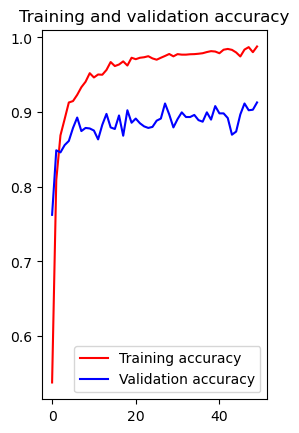

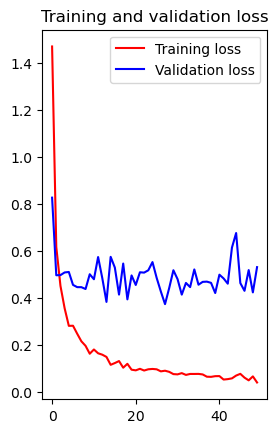

<Figure size 640x480 with 0 Axes>

In [146]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()



plt.show()

In [147]:
!mkdir -p saved_model
model.save('saved_model/inceptionv3best')

INFO:tensorflow:Assets written to: saved_model/inceptionv3best\assets


INFO:tensorflow:Assets written to: saved_model/inceptionv3best\assets


In [148]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.


In [149]:
model.save('inceptionv3best.h5')